In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import keras.utils
from tensorflow.python.keras.utils import np_utils

In [2]:
df = pd.read_csv("car.data", header=None)

df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','label']


In [3]:
# 결측치 확인
missing_values = df.isna().sum()
print (missing_values)
# 결측치가 있는 행 제거
df = df.dropna()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
label       0
dtype: int64


In [4]:
df

,buying,maint,doors,persons,lug_boot,safety,label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:

target = df['label']


features = df.drop(columns=['label'])


print(features.head())
print(target.head())

  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med
0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: label, dtype: object


In [6]:
target

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: label, Length: 1728, dtype: object

In [7]:
one_hot_encoded = pd.get_dummies(target)

In [8]:
one_hot_encoded.values

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in features.columns:

    features[i]=label_encoder.fit_transform(features[i])

In [10]:
features


,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [11]:
x = features.values
y = one_hot_encoded.values

In [12]:
x.shape

(1728, 6)

In [13]:
y.shape

(1728, 4)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(6, input_shape=(6,), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(lr=0.02), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 154 (616.00 Byte)
Trainable params: 154 (616.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 5ms/step - loss: 1.6119 - accuracy: 0.1860 - val_loss: 1.3133 - val_accuracy: 0.6879
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 1.1927 - accuracy: 0.6918 - val_loss: 1.0084 - val_accuracy: 0.7254
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 1.0083 - accuracy: 0.6939 - val_loss: 0.9060 - val_accuracy: 0.7225
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.9353 - accuracy: 0.6939 - val_loss: 0.8587 - val_accuracy: 0.7254
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8981 - accuracy: 0.6939 - val_loss: 0.8382 - val_accuracy: 0.7254
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8796 - accuracy: 0.6939 - val_loss: 0.8263 - val_accuracy: 0.7254
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8688 - accuracy: 0.6939 - val_loss: 0.8164 - val_accuracy: 0.7254
Epoch 8/100
4

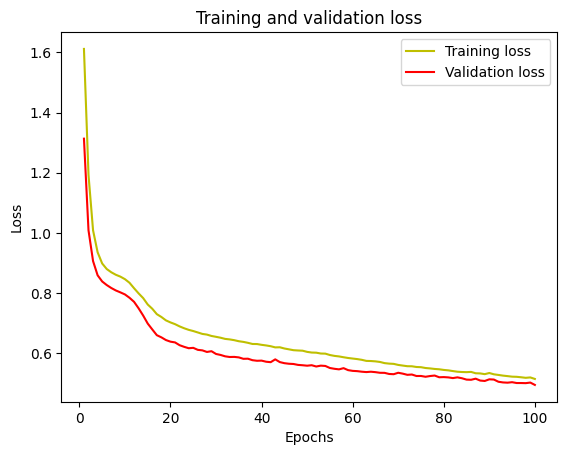

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

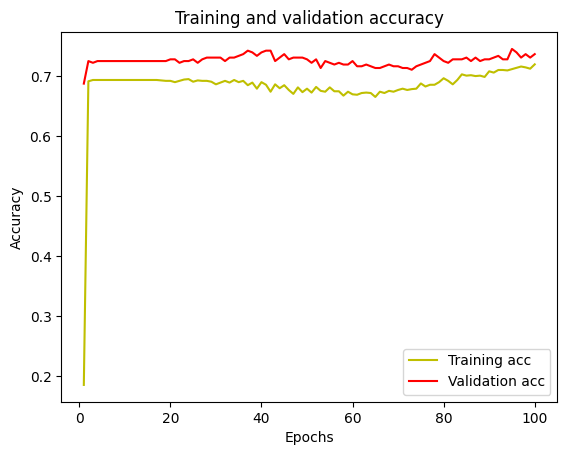

In [18]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.45      0.39      0.42        71
           1       0.00      0.00      0.00        15
           2       0.82      0.89      0.85       251
           3       0.31      0.44      0.36         9

    accuracy                           0.74       346
   macro avg       0.40      0.43      0.41       346
weighted avg       0.70      0.74      0.72       346

[[ 28   0  43   0]
 [  9   0   3   3]
 [ 22   0 223   6]
 [  3   0   2   4]]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [20]:
from sklearn.metrics import f1_score
print(f1_score(y_test_class,y_pred_class, average='micro'))

0.7369942196531792
